#Exploratory Data Analysis on Climate Change vs Global Warming

In [ ]:
#importing libraries
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

In [ ]:
url = "https://raw.githubusercontent.com/Another-Curious-Mind/Data-Science/main/Breakdown_Region.csv"
df = pd.read_csv(url)

In [ ]:
#Reading Data Head
df.head()

,Country,Climate change: (1/1/04 - 9/27/21),Global Warming: (1/1/04 - 9/27/21)
0,Kiribati,100%,NaN
1,Marshall Islands,84%,16%
2,Micronesia,100%,NaN
3,Solomon Islands,82%,18%
4,Vanuatu,86%,14%


In [ ]:
#Reading Data Tail
df.tail()

,Country,Climate change: (1/1/04 - 9/27/21),Global Warming: (1/1/04 - 9/27/21)
245,St. Pierre & Miquelon,NaN,NaN
246,Tokelau,NaN,NaN
247,U.S. Outlying Islands,NaN,NaN
248,Vatican City,NaN,NaN
249,Wallis & Futuna,NaN,NaN


In [ ]:
# Rename columns
new_column_names = {'Climate change: (1/1/04 - 9/27/21)': 'Climate change(percent)', 'Global Warming: (1/1/04 - 9/27/21)': 'Global Warming(percent)'}
df.rename(columns=new_column_names, inplace=True)

In [ ]:
df.columns

Index(['Country', 'Climate change(percent)', 'Global Warming(percent)'], dtype='object')

In [ ]:
# removing % sign from comlumns value
df['Climate change(percent)'] = df['Climate change(percent)'].str.replace('%','')
df['Global Warming(percent)'] = df['Global Warming(percent)'].str.replace('%','')

In [ ]:
df.head(2)

,Country,Climate change(percent),Global Warming(percent)
0,Kiribati,100,NaN
1,Marshall Islands,84,16


In [ ]:
#Check Null
df.isnull().values.any()

True

In [ ]:
#Count the number of Null values
df.isnull().values.sum()

122

In [ ]:
#Showing the null values as per attributes
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Climate change(percent)    38
Global Warming(percent)    84
dtype: int64

In [ ]:
 #dropping null values
 df.dropna(inplace=True)

In [ ]:
df.isnull().values.sum()

0

In [ ]:
#Showing Columns
df.columns

Index(['Country', 'Climate change(percent)', 'Global Warming(percent)'], dtype='object')

In [ ]:
#Describing Data Set
df.describe()

,Country,Climate change(percent),Global Warming(percent)
count,166,166,166
unique,166,30,30
top,Marshall Islands,67,33
freq,1,14,14


In [ ]:
#Data set Shape
df.shape

(166, 3)

In [ ]:
#Data set info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 1 to 211
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Country                  166 non-null    object
 1   Climate change(percent)  166 non-null    object
 2   Global Warming(percent)  166 non-null    object
dtypes: object(3)
memory usage: 5.2+ KB


In [ ]:
# changing data type "object" to "int"
df['Climate change(percent)'] = df['Climate change(percent)'].astype(int)
df['Global Warming(percent)'] = df['Global Warming(percent)'].astype(int)

In [ ]:
#Data set info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 1 to 211
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Country                  166 non-null    object
 1   Climate change(percent)  166 non-null    int64 
 2   Global Warming(percent)  166 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 5.2+ KB


In [ ]:
df.mean()

<ipython-input-21-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


Climate change(percent)    69.903614
Global Warming(percent)    30.096386
dtype: float64

In [ ]:
#Dataset median
print("Median of Climate Change (percent):", df['Climate change(percent)'].median())

Median of Climate Change (percent): 69.5


In [ ]:
print("Median of Global Warming(percent):",df['Global Warming(percent)'].median())

Median of Global Warming(percent): 30.5


In [ ]:
#Checking kurtosis
df.kurtosis()

      # Here in otuput both of the values says that there is positive curtosis. Positive kurtosis indicates that the distribution has heavier tails (more extreme values) compared to a normal distribution.

<ipython-input-24-0e1bcb1208c3>:2: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.kurtosis()


Climate change(percent)    0.546653
Global Warming(percent)    0.546653
dtype: float64

In [ ]:
#Checking skewness
df.skew()




      # Climate change(percent)" with Skewness 0.373277 (Positive Skewness):
              # indicate that there are relatively few data points with very high values, causing the distribution to be stretched to the right.
              # It suggests that the data might have some positive outliers or extreme values in the higher range.

      # "Global Warming(percent)" with Skewness -0.373277 (Negative Skewness):
              # indicate that there are relatively few data points with very low values, causing the distribution to be stretched to the left.
              # It suggests that the data might have some negative outliers or extreme values in the lower range.

<ipython-input-25-a9584da0d626>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Climate change(percent)    0.373277
Global Warming(percent)   -0.373277
dtype: float64

In [ ]:
#Checking correlation
df.corr()

<ipython-input-26-046fc28267c1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Climate change(percent),Global Warming(percent)
Climate change(percent),1.0,-1.0
Global Warming(percent),-1.0,1.0


<ipython-input-48-206270447538>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



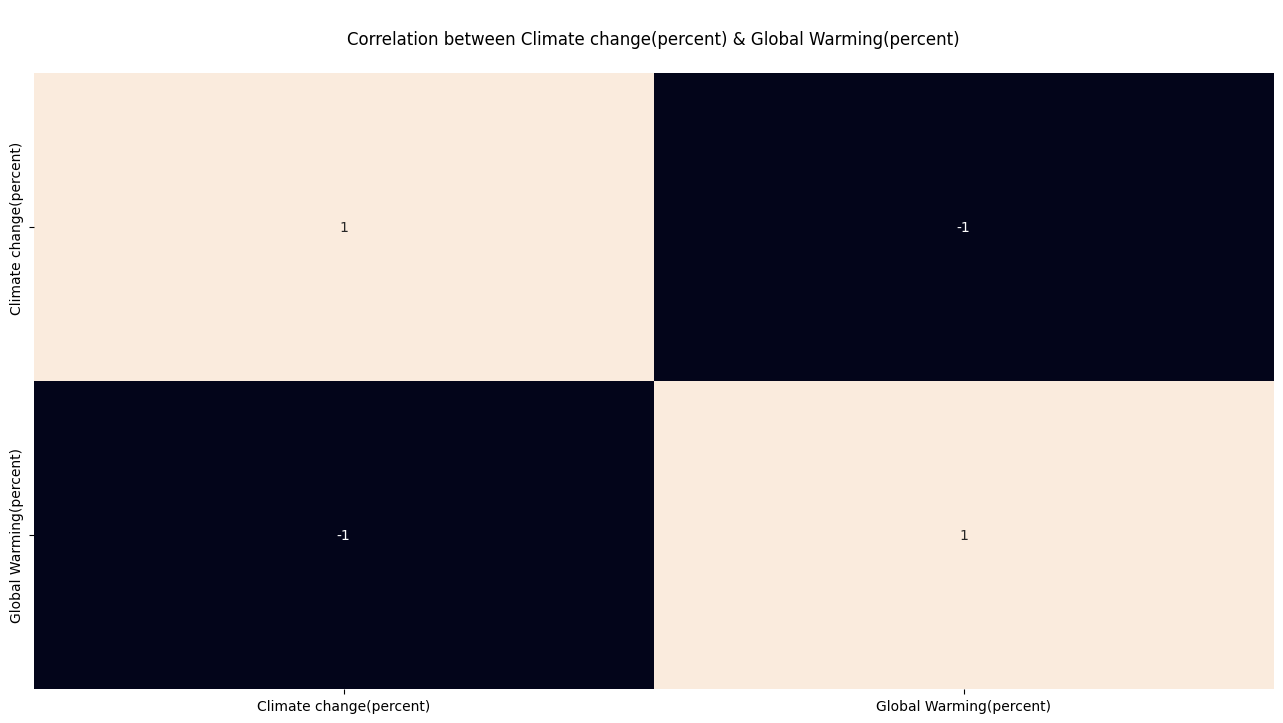

In [ ]:
#Generating Heatmap
correlation = df.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cbar=False)

plt.title("\nCorrelation between Climate change(percent) & Global Warming(percent)\n")

plt.show()

In [ ]:
#Checking covariance
df.cov()

<ipython-input-28-f664d01a255f>:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.cov()


,Climate change(percent),Global Warming(percent)
Climate change(percent),40.269441,-40.269441
Global Warming(percent),-40.269441,40.269441


In [ ]:
#max value
print("Maximum percetage of climate change is ",df['Climate change(percent)'].max())


Maximum percetage of climate change is  88


In [ ]:
# Find the index of the row with the maximum percentage of climate change
max_index = df['Climate change(percent)'].idxmax()

# Use the index to locate the corresponding country
country_with_max = df.loc[max_index, 'Country']

# Print the result
print("Country with the Maximum Percentage of Climate Change is:", country_with_max)

Country with the Maximum Percentage of Climate Change is: Tonga


In [ ]:
# Find the index of the row with the maximum percentage of Global Warming
max_index = df['Global Warming(percent)'].idxmax()


# Use the index to locate the corresponding country
country_with_max = df.loc[max_index, 'Country']


# Print the result
print("The Country '",country_with_max,"' has the higest Percentage of Global Warming, & the percentage is:",df['Global Warming(percent)'].max())

The Country ' Indonesia ' has the higest Percentage of Global Warming, & the percentage is: 51


In [ ]:
df['Climate change(percent)'].mean()

69.90361445783132

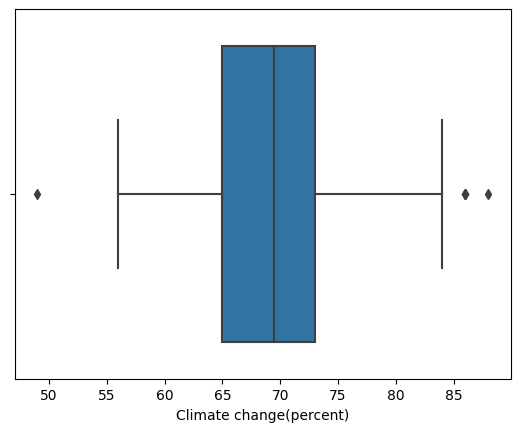

In [ ]:
ax = sns.boxplot(x=df["Climate change(percent)"])

In [ ]:
df['Global Warming(percent)'].mean()

30.096385542168676

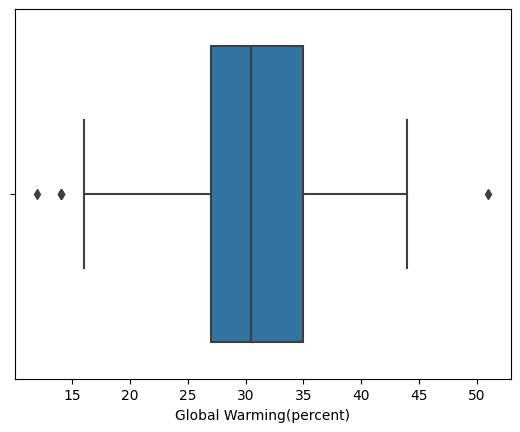

In [ ]:
ax = sns.boxplot(x=df["Global Warming(percent)"])

array([[<Axes: title={'center': 'Climate change(percent)'}>,
        <Axes: title={'center': 'Global Warming(percent)'}>]],
      dtype=object)

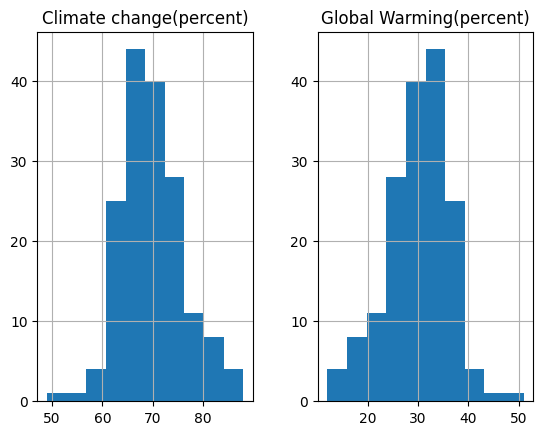

In [ ]:
df.hist()

Text(0.5, 1.0, '\nScatter Plot of Climate Change vs. Global Warming\n')

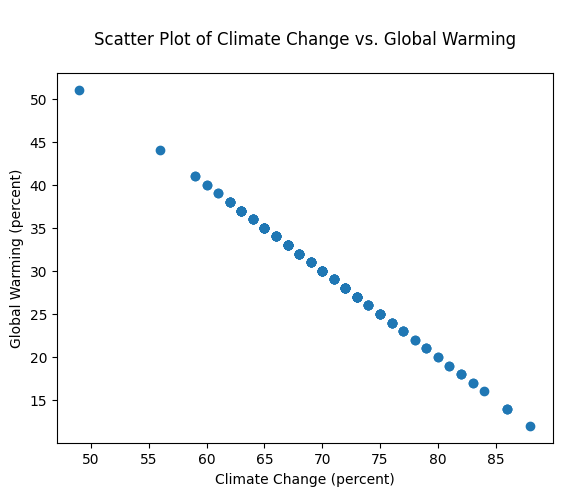

In [ ]:
plt.scatter(df['Climate change(percent)'], df['Global Warming(percent)'])
plt.xlabel('Climate Change (percent)')
plt.ylabel('Global Warming (percent)')
plt.title('\nScatter Plot of Climate Change vs. Global Warming\n')

In [ ]:
df.columns

Index(['Country', 'Climate change(percent)', 'Global Warming(percent)'], dtype='object')

In [ ]:
# Sort and select the top N countries
top_countries = df.nlargest(5, 'Climate change(percent)')

# Create a bar chart using Plotly Express
fig = px.bar(top_countries, x='Country', y='Climate change(percent)', template="plotly_white",color="Country",text="Climate change(percent)",title = "Top 5 nations with the highest climate change percentages.")

# Set the title font size to 24
fig.update_layout(title={'font': {'size': 24}})

# Show the plot
fig.show()


In [ ]:
# Sort and select the top N countries
lowest_values = df.nsmallest(3, 'Climate change(percent)')

# Create a bar chart using Plotly Express
fig = px.bar(lowest_values, x='Country', y='Climate change(percent)', template="plotly_white",color="Country",text="Climate change(percent)",title = "Nations with the lowest climate change percentages.")

# Set the title font size to 24
fig.update_layout(title={'font': {'size': 24}})

# Show the plot
fig.show()

In [ ]:
# Sort and select the top N countries
top_countries = df.nlargest(5, 'Global Warming(percent)')

# Create a bar chart using Plotly Express
fig = px.bar(top_countries, x='Country', y='Global Warming(percent)', template="plotly_white",color="Country",text="Global Warming(percent)",title = "Top 5 nations with the highest global warming percentages.")

# Set the title font size to 24
fig.update_layout(title={'font': {'size': 24}})

# Show the plot
fig.show()

In [ ]:
# Sort and select the top N countries
lowest_values = df.nsmallest(3, 'Global Warming(percent)')

# Create a bar chart using Plotly Express
fig = px.bar(lowest_values, x='Country', y='Global Warming(percent)', template="plotly_white",color="Country",text="Global Warming(percent)",title = "Nations with the lowest global warming percentages.")

# Set the title font size to 24
fig.update_layout(title={'font': {'size': 24}})

# Show the plot
fig.show()

#Key Findings from Exploratory Data Analysis (EDA):
1. This dataset has null value
2. Data type need to be changed
3. There is a negative correlation between climate change and global warming percentages.
4. Tonga has the highest climate change percentage at 88%.
5. Indonesia has the highest global warming percentage at 51%.
6. Both climate change and global warming percentages has outliers.
7. Indonesia reports the lowest climate change percentage at 49%.
8. Tonga records the lowest climate change percentage, standing at only 12%.
